## Final Project Submission

* Student name: STEPHEN MULINGWA
* Student pace: FULL-TIME
* Instructor name: MARYANN MWIKALI


## Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing our dataset
# Since datasel is really large I used argument "low_memory = False" inorder for pandas to read the data in chuncks of columns
df = pd.read_csv("data/Aviation_Data.csv", low_memory=False, index_col=0) 

In [3]:
# Check the dataframe
df.head()

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Data Understanding
Before we begin our analysis we need to get an overview of the information and summary of the Aviation data
     
* Get to know the dimensions of the data
* Understand the features in the data
* Check for missing data
* Check for Duplicates
* Data Cleaning

In [4]:
# Summary of the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90348 entries, 20001218X45444 to 20221230106513
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      90348 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Latitude                34382 non-null  object 
 6   Longitude               34373 non-null  object 
 7   Airport.Code            50132 non-null  object 
 8   Airport.Name            52704 non-null  object 
 9   Injury.Severity         87889 non-null  object 
 10  Aircraft.damage         85695 non-null  object 
 11  Aircraft.Category       32287 non-null  object 
 12  Registration.Number     87507 non-null  object 
 13  Make                    88826 non-null  object 
 14  Model                

In [5]:
# Checking for the dimension of the df
df.shape

(90348, 30)

In [6]:
# Checking for the percentage of missing values
df.isnull().mean()*100

Investigation.Type         0.000000
Accident.Number            1.614867
Event.Date                 1.614867
Location                   1.672422
Country                    1.865011
Latitude                  61.944924
Longitude                 61.954886
Airport.Code              44.512330
Airport.Name              41.665560
Injury.Severity            2.721698
Aircraft.damage            5.150086
Aircraft.Category         64.263736
Registration.Number        3.144508
Make                       1.684597
Model                      1.716695
Amateur.Built              1.727764
Number.of.Engines          8.348829
Engine.Type                9.468942
FAR.Description           64.555939
Schedule                  86.073848
Purpose.of.flight          8.468367
Air.carrier               81.573471
Total.Fatal.Injuries      14.233851
Total.Serious.Injuries    15.461327
Total.Minor.Injuries      14.822686
Total.Uninjured            8.158454
Weather.Condition          6.586753
Broad.phase.of.flight     31

In [7]:
# Copy of my Original data
original_data = df.copy()

In [8]:
df = original_data.copy()

In [9]:
df[df.duplicated()]

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning
### Dropping Duplicates and Columns
* I will be dropping Duplicate rows
* Also, I am going to drop columns that have high percentage of missing values and any column that is not relevant in the analysis

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.shape

(88958, 30)

In [12]:
# Checking for the percentage of missing values
df.isnull().mean()*100

Investigation.Type         0.000000
Accident.Number            0.077565
Event.Date                 0.077565
Location                   0.136019
Country                    0.331617
Latitude                  61.350300
Longitude                 61.360417
Airport.Code              43.645316
Airport.Name              40.754064
Injury.Severity            1.201691
Aircraft.damage            3.668023
Aircraft.Category         63.705344
Registration.Number        1.631107
Make                       0.148385
Model                      0.180984
Amateur.Built              0.192226
Number.of.Engines          6.916747
Engine.Type                8.054363
FAR.Description           64.002113
Schedule                  85.856247
Purpose.of.flight          7.038153
Air.carrier               81.285550
Total.Fatal.Injuries      12.893725
Total.Serious.Injuries    14.140381
Total.Minor.Injuries      13.491760
Total.Uninjured            6.723398
Weather.Condition          5.127139
Broad.phase.of.flight     30

In [13]:
# Dropping columns that are not relevant for my analysis and with alot of missing values over 60%
df.drop(columns=['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'FAR.Description',
                 'Broad.phase.of.flight','Schedule', 'Air.carrier', 'Publication.Date'], inplace = True)

In [14]:
df.shape

(88958, 20)

In [15]:
df.isnull().mean()*100

Investigation.Type         0.000000
Accident.Number            0.077565
Event.Date                 0.077565
Location                   0.136019
Country                    0.331617
Injury.Severity            1.201691
Aircraft.damage            3.668023
Registration.Number        1.631107
Make                       0.148385
Model                      0.180984
Amateur.Built              0.192226
Number.of.Engines          6.916747
Engine.Type                8.054363
Purpose.of.flight          7.038153
Total.Fatal.Injuries      12.893725
Total.Serious.Injuries    14.140381
Total.Minor.Injuries      13.491760
Total.Uninjured            6.723398
Weather.Condition          5.127139
Report.Status              7.253985
dtype: float64

### Dealing with Missing Data
#### Categorical Data
* For the categorical data with missing values am going to drop the rows

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88958 entries, 20001218X45444 to 20221230106513
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88958 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Injury.Severity         87889 non-null  object 
 6   Aircraft.damage         85695 non-null  object 
 7   Registration.Number     87507 non-null  object 
 8   Make                    88826 non-null  object 
 9   Model                   88797 non-null  object 
 10  Amateur.Built           88787 non-null  object 
 11  Number.of.Engines       82805 non-null  float64
 12  Engine.Type             81793 non-null  object 
 13  Purpose.of.flight       82697 non-null  object 
 14  Total.Fatal.Injuries 

In [17]:
# Dropping rows with missing values only for object columns
df.dropna(subset=df.select_dtypes(include=['object']).columns, inplace=True)

In [18]:
df.shape

(75912, 20)

In [19]:
df.isnull().mean()*100

Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          1.637422
Engine.Type                0.000000
Purpose.of.flight          0.000000
Total.Fatal.Injuries      12.380124
Total.Serious.Injuries    13.489303
Total.Minor.Injuries      12.522394
Total.Uninjured            6.122879
Weather.Condition          0.000000
Report.Status              0.000000
dtype: float64

### Continuous Data
* For continuous data with missing values I am going to impute with the median since it represents a more typical measure of central tendency and is least affected by outliers.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75912 entries, 20001218X45444 to 20221109106272
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      75912 non-null  object 
 1   Accident.Number         75912 non-null  object 
 2   Event.Date              75912 non-null  object 
 3   Location                75912 non-null  object 
 4   Country                 75912 non-null  object 
 5   Injury.Severity         75912 non-null  object 
 6   Aircraft.damage         75912 non-null  object 
 7   Registration.Number     75912 non-null  object 
 8   Make                    75912 non-null  object 
 9   Model                   75912 non-null  object 
 10  Amateur.Built           75912 non-null  object 
 11  Number.of.Engines       74669 non-null  float64
 12  Engine.Type             75912 non-null  object 
 13  Purpose.of.flight       75912 non-null  object 
 14  Total.Fatal.Injuries 

In [21]:
# Checking for the descriptive Statistics
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,74669.000000,66514.000000,65672.000000,66406.000000,71264.000000
mean,1.116662,0.443185,0.237773,0.325618,2.340537
std,0.379483,3.040532,0.827569,1.452530,15.226908
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,270.000000,81.000000,171.000000,699.000000


In [22]:
# List of columns to replace missing values with their median
continuous_columns = ['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

In [23]:
# Replace missing values with the median for the specified columns
df[continuous_columns] = df[continuous_columns].fillna(df[continuous_columns].median())

In [24]:
df.isnull().sum()

Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
dtype: int64

* My data is now clean and ready for analysis

In [25]:
df.shape

(75912, 20)

In [26]:
# Creating a copy of my clean dataset
cleaned_df = df.copy()

In [27]:
# Save the cleaned DataFrame to a CSV file
#cleaned_df.to_csv('cleaned_Aviation_data.csv', index=False)

In [28]:
df = cleaned_df.copy()

## Data Visualization

### Pie Chart
* Checking for the Distribution of the Airplane Investigation types

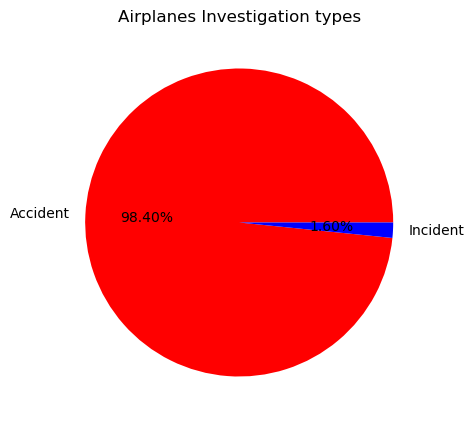

In [29]:
plt.figure(figsize = (8, 5))
plt.pie(df['Investigation.Type'].value_counts(), labels = ['Accident', 'Incident'], colors = ['red', 'blue'], autopct = '%1.2f%%')
plt.title('Airplanes Investigation types')
plt.show()

* From the pie chart it is evident that accidents were the most common type of investigation at 98.40%. Thus, accidents are the most common problem facing the aviation industry.

## Bar Charts
* Here, I'm interested in knowing the Purpose of the flights that led to the accidents.
* Also, I am investigating which Makes and Models are prone to accidents.

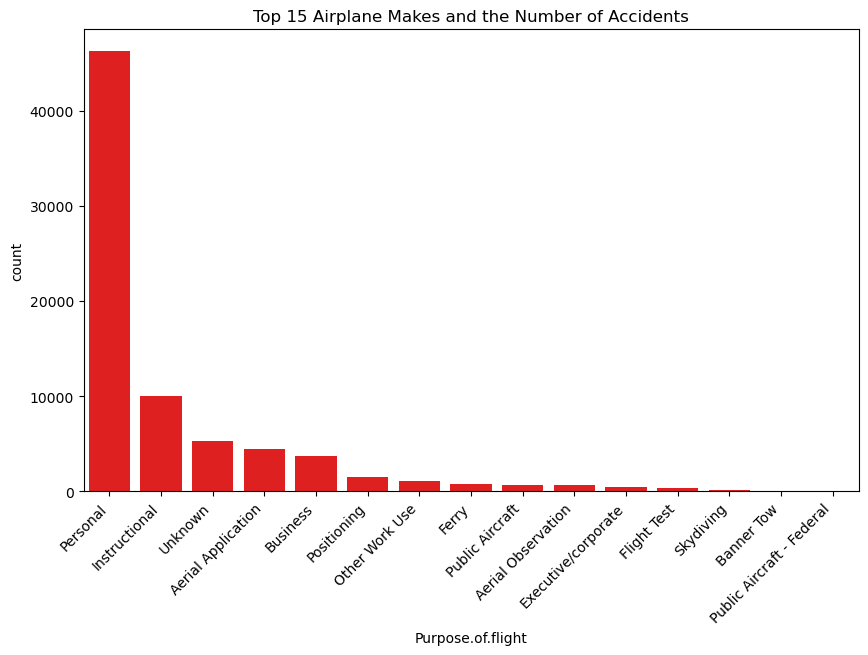

In [30]:
# Accidents based on the Purpose of flights
purpose_of_flight_15 = df['Purpose.of.flight'].value_counts().nlargest(15).index
purpose_of_flight = df[df['Purpose.of.flight'].isin(purpose_of_flight_15)]

plt.figure(figsize=(10, 6))
sns.countplot(data=purpose_of_flight, x='Purpose.of.flight', order=purpose_of_flight_15, color = 'red')
plt.title('Top 15 Airplane Makes and the Number of Accidents')
plt.xticks(rotation=45, ha='right') 
plt.show()

* From the above graph it is evident that Personal, Instructional, and Unknown are the leading causes of accidents.
* Thus, due to this, the company will need to restrict offering airplanes for this reasons and go for low use of flights with minimal accidents.

In [31]:
# Ensuring consistent unique values of Make 
df['Make_lowercase'] = df['Make'].str.lower()
df['Make'] = df['Make_lowercase'].str.capitalize()

df.drop(columns=['Make_lowercase'], inplace=True)
df['Make'].unique()

array(['Stinson', 'Piper', 'Cessna', ..., 'Hibbard norman e',
       'Waszak arthur b', 'Stephen j hoffman'], dtype=object)

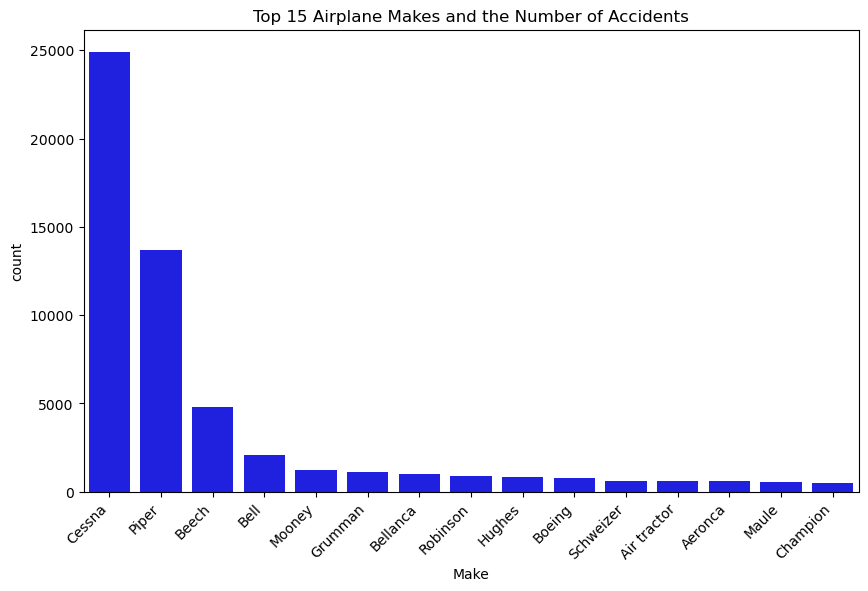

In [32]:
# Accidents based on the make of the Airplanes
top_15_makes = df['Make'].value_counts().nlargest(15).index

top_15_df = df[df['Make'].isin(top_15_makes)]

plt.figure(figsize=(10, 6))
sns.countplot(data=top_15_df, x='Make', order=top_15_makes, color = 'blue')
plt.title('Top 15 Airplane Makes and the Number of Accidents')
plt.xticks(rotation=45, ha='right') 
plt.show()

* From the makes above, Cessna, Piper, and Beech Makes of airplanes have the highest number of accidents.
* Thus, the company will need to cross-check against the makes to avoid the airplanes.

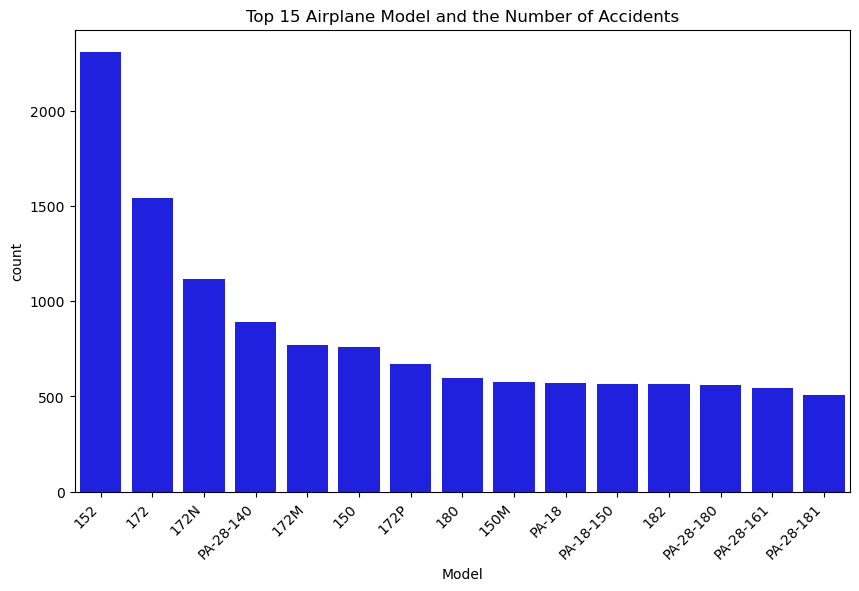

In [33]:
# Get the top 10 airplane Model by accident count
top_15_models = df['Model'].value_counts().nlargest(15).index

top_15_df = df[df['Model'].isin(top_15_models)]

plt.figure(figsize=(10, 6))
sns.countplot(data=top_15_df, x='Model', order=top_15_models, color = 'blue')
plt.title('Top 15 Airplane Model and the Number of Accidents')
plt.xticks(rotation=45, ha='right') 
plt.show()

* These are the aircraft models with the highest accident rates. The company should avoid purchasing these models.

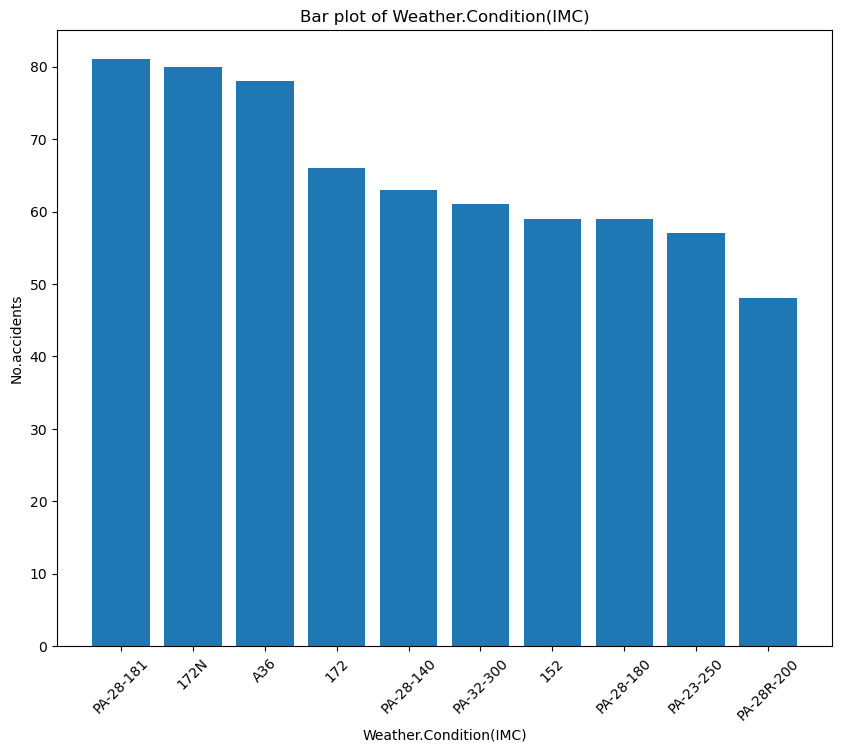

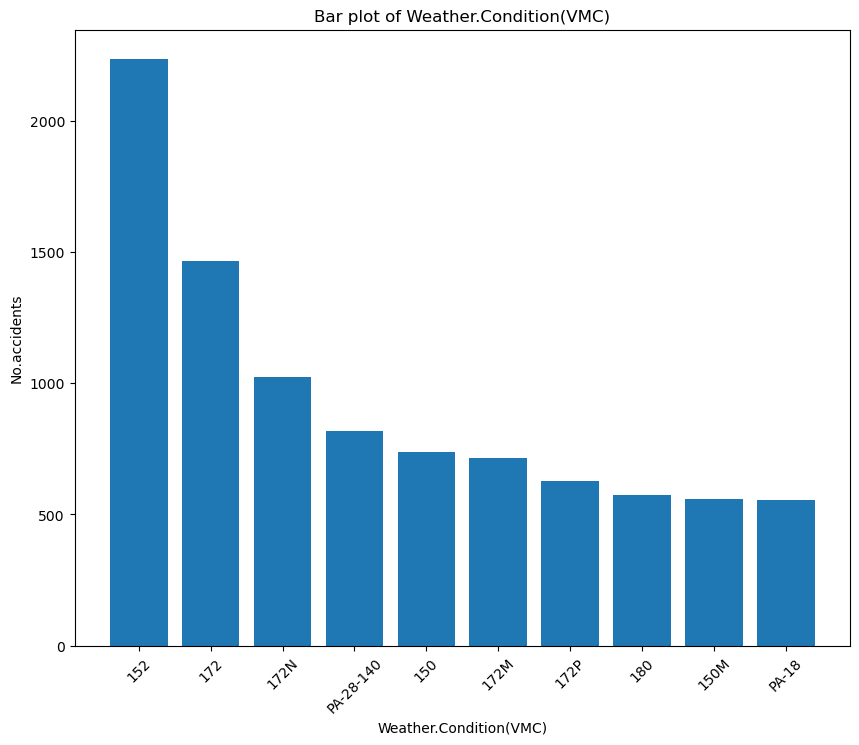

In [34]:
# Weather condition
Weather_data=df.groupby(['Weather.Condition','Model']).count()['Number.of.Engines'].sort_values(ascending=False)
Weather_data['VMC'].head(10)
Weather_data['IMC'].head(10)
# create a function
def Bar_plot(dataset,column):
    plt.figure(figsize=(10,8))
    plt.bar(x=dataset.index,height=dataset.values)
    plt.title(f'Bar plot of {column}')
    plt.ylabel('No.accidents')
    plt.xlabel(f'{column}')
    plt.xticks(rotation =45);
# Weather_data
Bar_plot(Weather_data['IMC'].head(10),'Weather.Condition(IMC)')
Bar_plot(Weather_data['VMC'].head(10),'Weather.Condition(VMC)')

* VMC: Clear conditions, fly by sight.
* IMC: Poor visibility, fly-by instruments.
* From the Weather Condition plots above, it is evident that Pilots cause accidents under clear conditions when the visibility is very clear.

## Time Series Plots

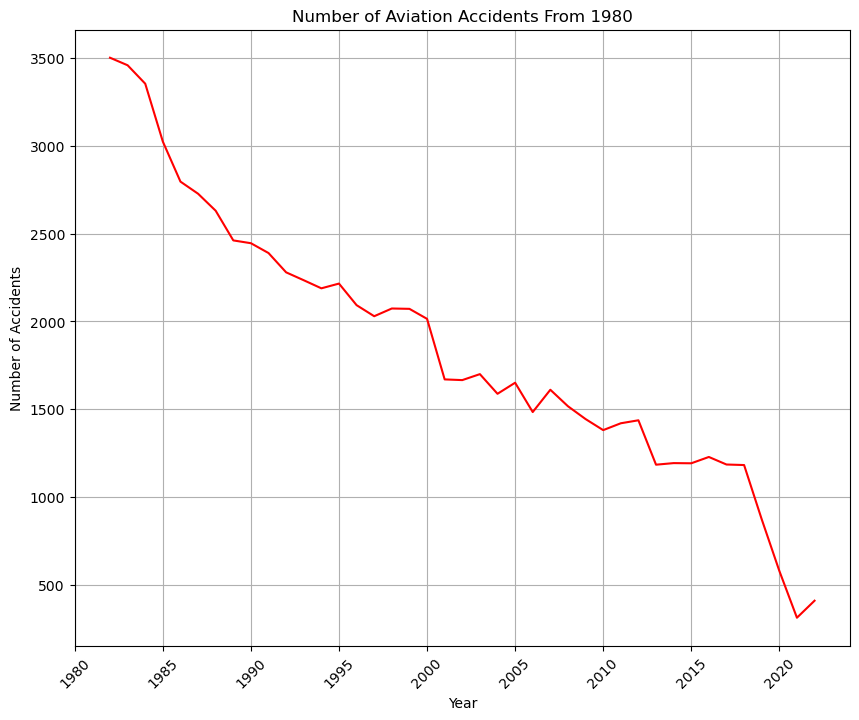

In [35]:
# Convert Event.Date to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

# Extract the year and filter the data from 1980 onwards
df['Year'] = df['Event.Date'].dt.year
df_filtered = df[df['Year'] >= 1982]

# Check for missing data and remove
df_filtered =df_filtered.dropna(subset=['Year'])

# Get the value counts of the accidents
Accident_year = df_filtered['Year'].value_counts().sort_index()
Accident_year
#Plot the year data
plt.figure(figsize=(10,8))
plt.plot(Accident_year.index,Accident_year.values, color = 'red')
plt.title('Number of Aviation Accidents From 1980')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

* The time series plot above shows that the number of accidents has been declining over the years.
* Thus, air travel is becoming a safe means of transport over time.

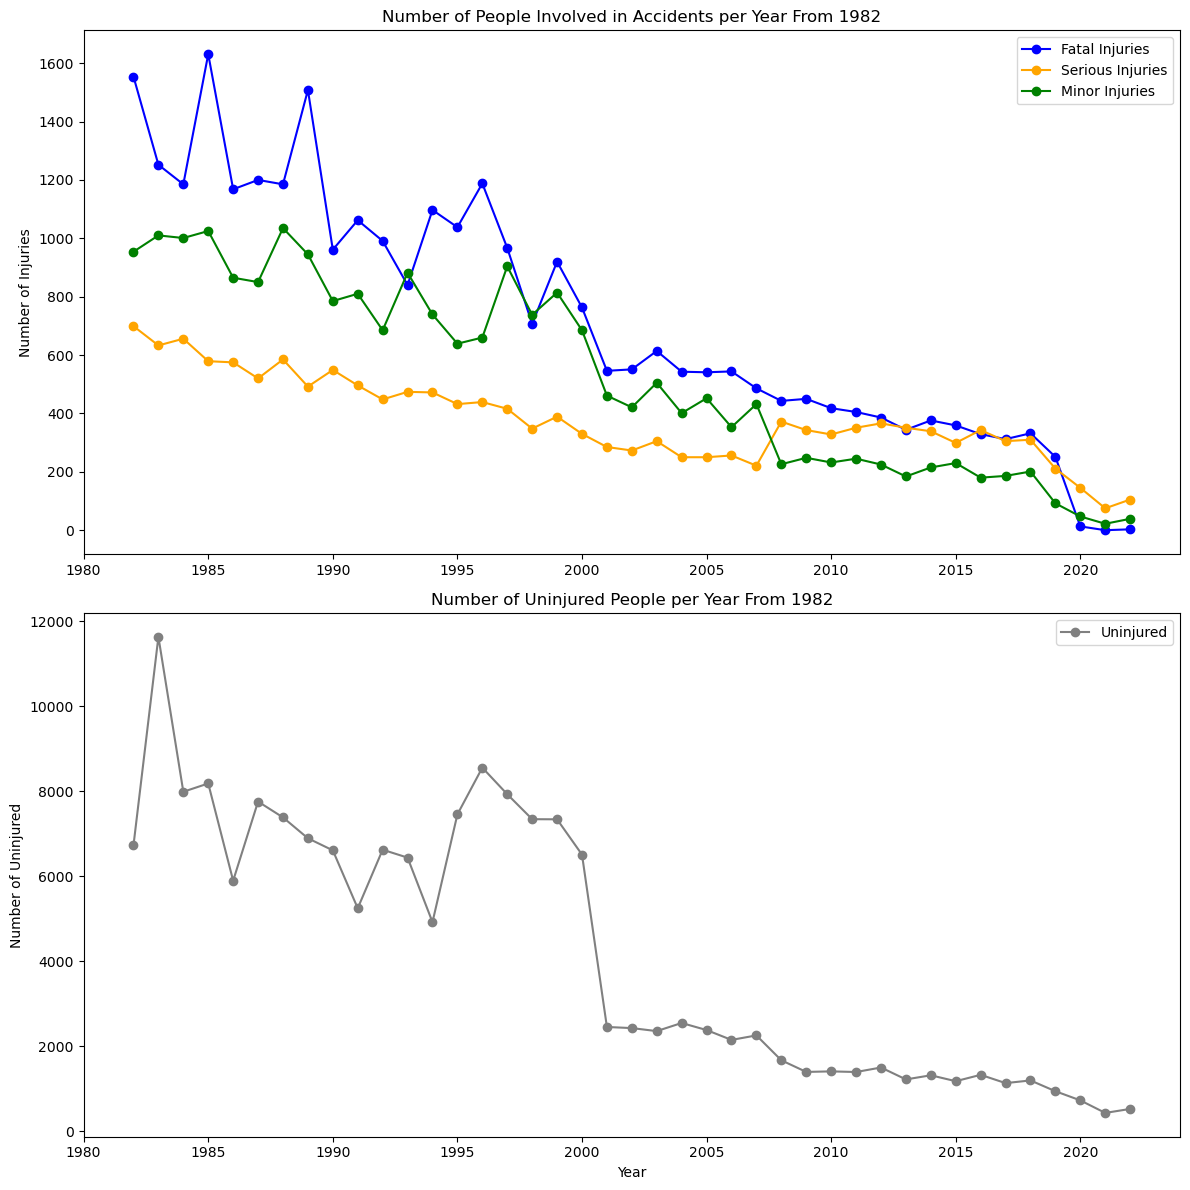

In [36]:
# Convert Event.Date to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

# Extract the year and filter the data from 1980 onwards
df['Year'] = df['Event.Date'].dt.year
df_filtered = df[df['Year'] >= 1982]

# Group by year and sum up injuries
yearly_data = df_filtered.groupby('Year').agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum',
    'Total.Uninjured': 'sum'
}).reset_index()

# Creating subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Plotting injuries on the first subplot
ax1.plot(yearly_data['Year'], yearly_data['Total.Fatal.Injuries'], label='Fatal Injuries', color='blue', marker='o')
ax1.plot(yearly_data['Year'], yearly_data['Total.Serious.Injuries'], label='Serious Injuries', color='orange', marker='o')
ax1.plot(yearly_data['Year'], yearly_data['Total.Minor.Injuries'], label='Minor Injuries', color='green', marker='o')
ax1.set_title('Number of People Involved in Accidents per Year From 1982')
ax1.set_ylabel('Number of Injuries')
ax1.legend()

# Plotting uninjured on the second subplot
ax2.plot(yearly_data['Year'], yearly_data['Total.Uninjured'], label='Uninjured', color='gray', marker='o')
ax2.set_title('Number of Uninjured People per Year From 1982')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Uninjured')
ax2.legend()


# Tighten the layout and display the plot
plt.tight_layout()
plt.show()

* From the time series plot above, the number of injured and uninjured airplane passengers has declined over the years.
* Thus, the aviation venture is a good venture for the business.